In [18]:
import os
import re
import pickle
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, log_loss, roc_auc_score, recall_score, precision_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from pygam import LogisticGAM
from sklearn.svm import SVC
import pygam as gam
from pygam import LogisticGAM

%matplotlib ipympl

InteractiveShell.ast_node_interactivity = "all"

working_directory = '/Users/cesareborgia/unige/predicting_hiv_status'
os.chdir(working_directory)

# Load raw data

TypeError: 'generator' object is not subscriptable

In [38]:
%run -i 'scripts/data_processing.py'

importing HIV test results (AR data) for all countries from the data folder
opening /Users/cesareborgia/unige/predicting_hiv_status/Data/BUAR71DT/BUAR71FL.DTA ...
importing men (MR data) for all countries from the data folder
opening /Users/cesareborgia/unige/predicting_hiv_status/Data/BUMR70DT/BUMR70FL.DTA ...
importing women (IR data) for all countries from the data folder
opening /Users/cesareborgia/unige/predicting_hiv_status/Data/BUIR70DT/BUIR70FL.DTA ...
importing geolocalisation (GE data) for all countries from the data folder
merge individuals (men and women) per country with HIV status according to specific columns
 merge individuals (men and women) per country with geolocalisation according to specific columns


KeyError: 'BU'

# Load women data

In [18]:
%run -i 'scripts/features_engineering_women.py'

# Load men data

In [19]:
%run -i 'scripts/features_engineering_men.py'

# Imputation and scaling

In [24]:
%run -i "Scripts/scale_impute.py"

FileNotFoundError: [Errno 2] No such file or directory

# One left-out coutry algorithm results

In [ ]:
%run -i "Scripts\one_out_algorithms.py"

# XGBoost for all countries per gender

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 130.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 198.1min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 279.6min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 301.2min finished


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 122.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 220.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 339.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 482.2min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 520.1min finished


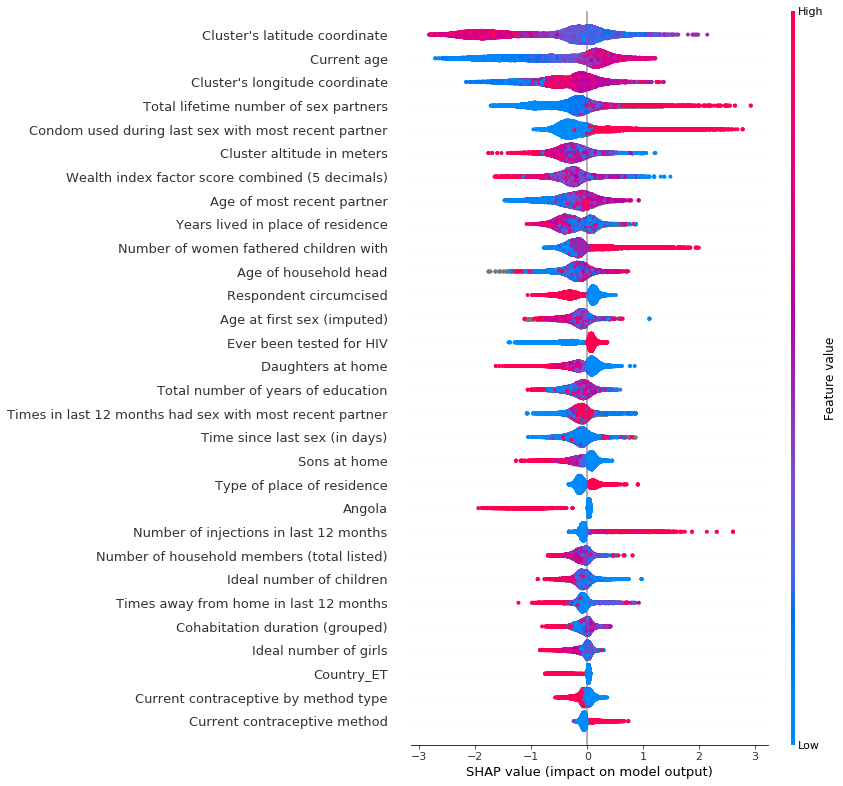

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [79]:
%run -i "Scripts\all countries.py"

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 66.7min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 94.8min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 102.2min finished


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 56.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 87.5min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 125.0min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 134.9min finished


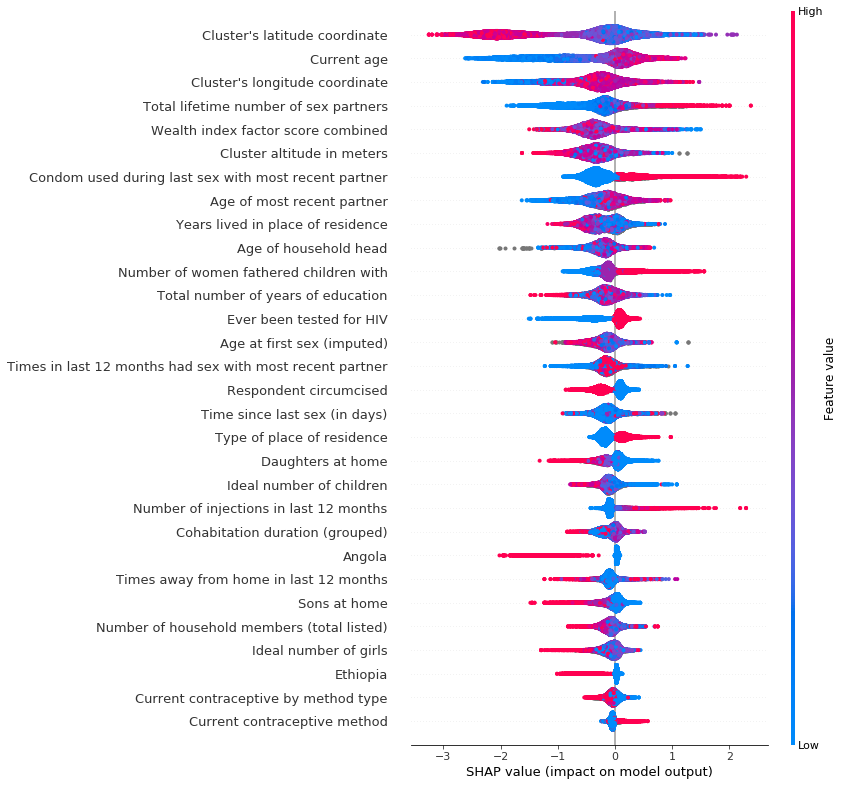

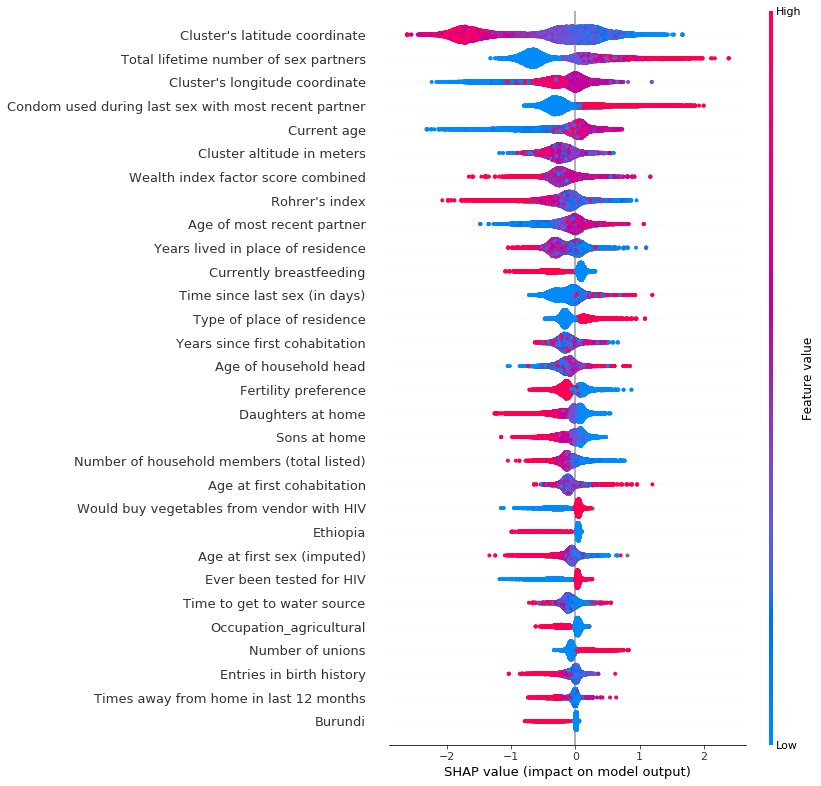

<Figure size 432x288 with 0 Axes>

In [86]:
%run -i "Scripts\selected_features.py"

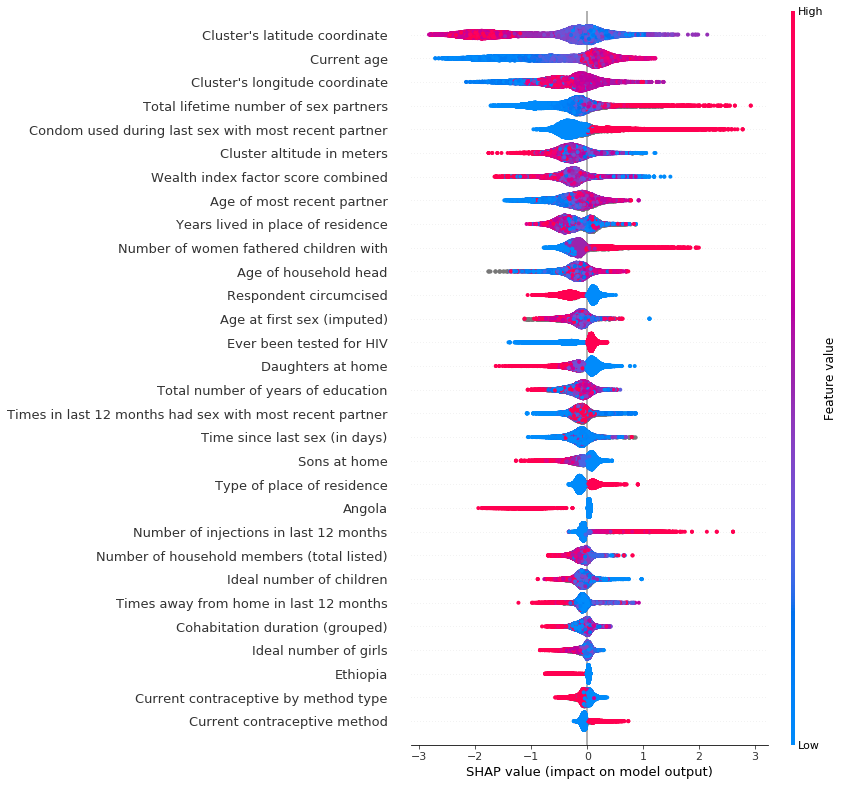

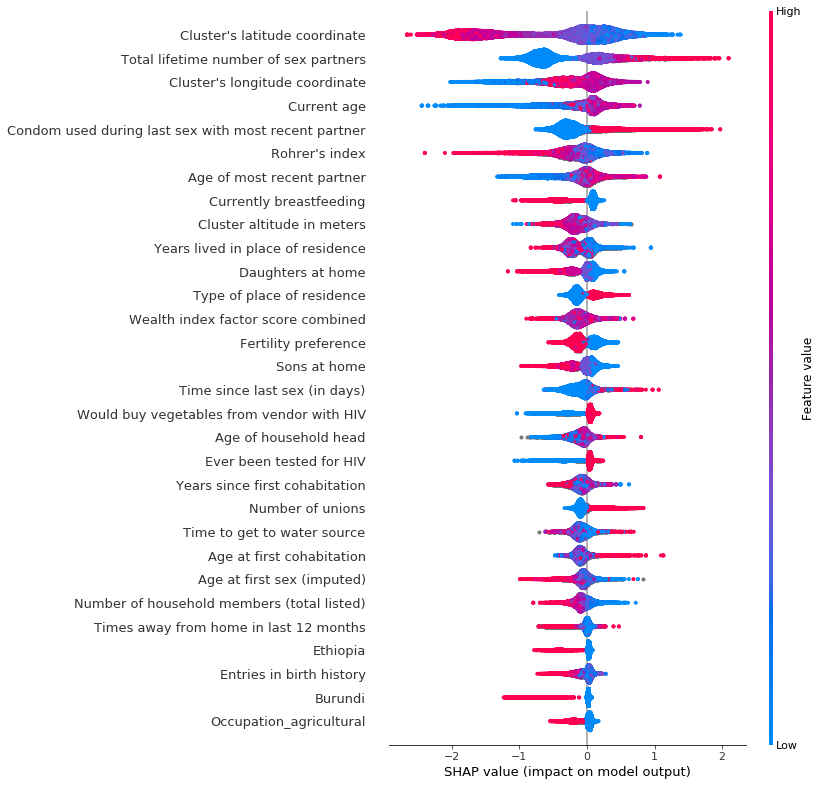

In [82]:
# rename some of the features
# rename some of the features
MR_rename_features_list = {'LATNUM': 'Cluster\'s latitude coordinate', 'LONGNUM': 'Cluster\'s longitude coordinate', 'Country_AO': 'Angola', 'Country_ZM': 'Zambia',
                          'Country_RW': 'Rwanda', 'Country_ET': 'Ethiopia', 'Wealth index factor score combined (5 decimals)': 'Wealth index factor score combined'}
IR_rename_features_list = {'The cluster\'s latitude coordinate': 'Cluster\'s latitude coordinate', 'The cluster\'s longitude coordinate': 'Cluster\'s longitude coordinate', 'Country_AO': 'Angola', 'Wealth index factor score combined (5 decimals)': 'Wealth index factor score combined', 
                           'Country_ZM': 'Zambia', 'Country_RW': 'Rwanda', 'NA - Rohrer\'s index': 'Rohrer\'s index', 'Country_ET': 'Ethiopia', 'Country_BU': 'Burundi'}

MR_X_train_comp.rename(columns=MR_rename_features_list, inplace=True)
IR_X_train_comp.rename(columns=IR_rename_features_list, inplace=True)
shap.summary_plot(MR_shap_values, MR_X_train_comp, max_display=30)
shap.summary_plot(IR_shap_values, IR_X_train_comp, max_display=30)

In [85]:
# rename some of the features
MR_rename_features_list = {'LATNUM': 'Cluster\'s latitude coordinate', 'LONGNUM': 'Cluster\'s longitude coordinate', 'Country_AO': 'Angola', 'Country_ZM': 'Zambia',
                          'Country_RW': 'Rwanda', 'Ethiopia': 'Country_ET', 'Wealth index factor score combined': 'Wealth index factor score combined (5 decimals)'}
IR_rename_features_list = {'Cluster\'s latitude coordinate': 'The cluster\'s latitude coordinate', 'Cluster\'s longitude coordinate': 'The cluster\'s longitude coordinate', 'Angola': 'Country_AO', 'Wealth index factor score combined': 'Wealth index factor score combined (5 decimals)', 
                           'Zambia': 'Country_ZM', 'Rwanda': 'Country_RW', 'Rohrer\'s index': 'NA - Rohrer\'s index', 'Ethiopia': 'Country_ET', 'Burundi': 'Country_BU'}

MR_X_train_comp.rename(columns=MR_rename_features_list, inplace=True)
IR_X_train_comp.rename(columns=IR_rename_features_list, inplace=True)
MR_cv_xgb_comp_pred = pd.DataFrame()
MR_cv_xgb_comp_pred = MR_cv_xgb_comp.predict(MR_X_test_comp)
confusion_matrix(MR_Y_train_comp, MR_cv_xgb_comp.predict(MR_X_train_comp))
confusion_matrix(MR_Y_test_comp, MR_cv_xgb_comp_pred)
recall_score(MR_Y_train_comp, MR_cv_xgb_comp.predict(MR_X_train_comp))
recall_score(MR_Y_test_comp, MR_cv_xgb_comp_pred)
precision_score(MR_Y_train_comp, MR_cv_xgb_comp.predict(MR_X_train_comp))
precision_score(MR_Y_test_comp, MR_cv_xgb_comp_pred)

IR_cv_xgb_comp_pred = pd.DataFrame()
IR_cv_xgb_comp_pred = IR_cv_xgb_comp.predict(IR_X_test_comp)
confusion_matrix(IR_Y_train_comp, IR_cv_xgb_comp.predict(IR_X_train_comp))
confusion_matrix(IR_Y_test_comp, IR_cv_xgb_comp_pred)
recall_score(IR_Y_train_comp, IR_cv_xgb_comp.predict(IR_X_train_comp))
recall_score(IR_Y_test_comp, IR_cv_xgb_comp_pred)
precision_score(IR_Y_train_comp, IR_cv_xgb_comp.predict(IR_X_train_comp))
precision_score(IR_Y_test_comp, IR_cv_xgb_comp_pred)

array([[40586,     0],
       [    0,  3534]], dtype=int64)

array([[10084,    64],
       [  289,   594]], dtype=int64)

1.0

0.6727066817667045

1.0

0.9027355623100304

array([[49291,     0],
       [    0,  6409]], dtype=int64)

array([[12143,   181],
       [  375,  1227]], dtype=int64)

1.0

0.7659176029962547

1.0

0.8714488636363636

# XGBoost for selected features

In [ ]:
%run -i "Scripts\selected_features.py"

array([[40586,     0],
       [    0,  3534]], dtype=int64)

array([[10081,    67],
       [  284,   599]], dtype=int64)

1.0

0.6783691959229898

1.0

0.8993993993993994

array([[49279,    12],
       [    0,  6409]], dtype=int64)

array([[12099,   225],
       [  387,  1215]], dtype=int64)

1.0

0.7584269662921348

0.9981311322223952

0.84375

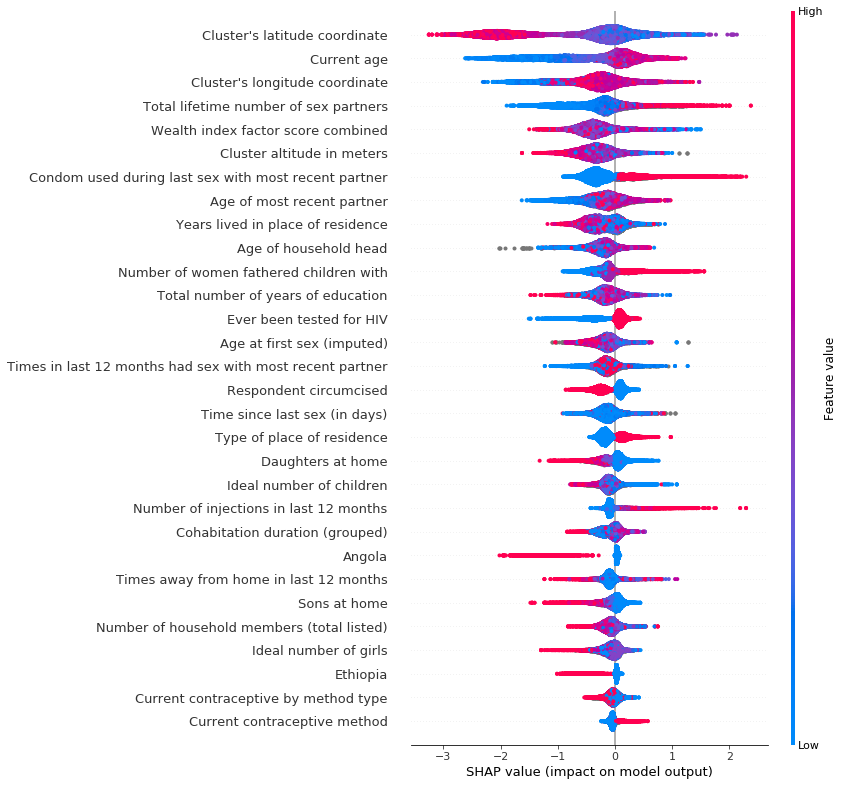

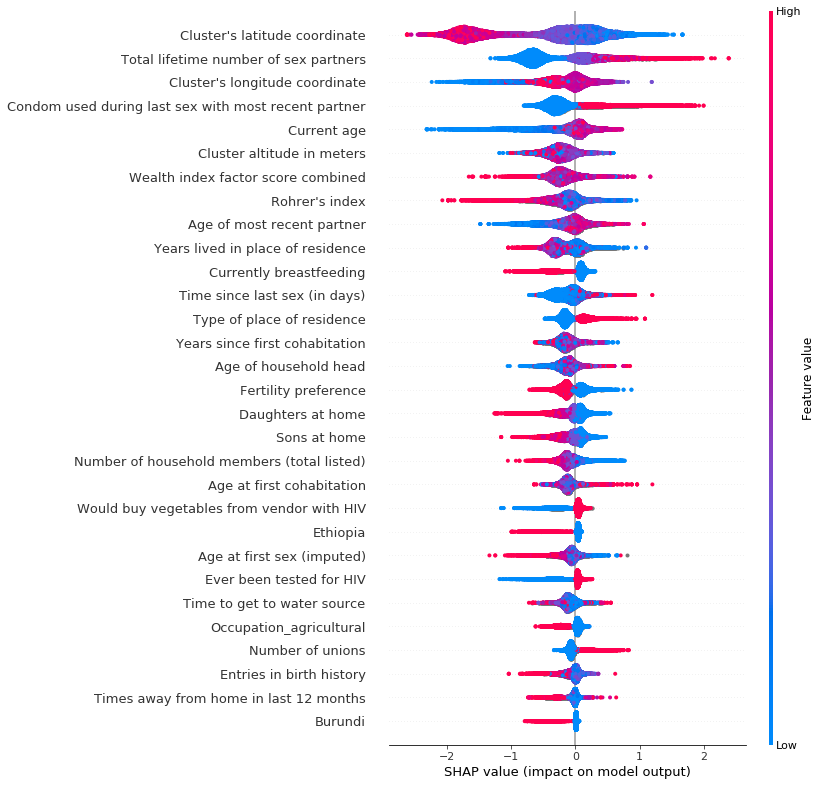

In [87]:
MR_cv_xgb_comp_na_pred = pd.DataFrame()
MR_cv_xgb_comp_na_pred = MR_cv_xgb_comp_na.predict(MR_X_test_comp_na)
confusion_matrix(MR_Y_train_comp_na, MR_cv_xgb_comp_na.predict(MR_X_train_comp_na))
confusion_matrix(MR_Y_test_comp_na, MR_cv_xgb_comp_na_pred)
recall_score(MR_Y_train_comp_na, MR_cv_xgb_comp_na.predict(MR_X_train_comp_na))
recall_score(MR_Y_test_comp_na, MR_cv_xgb_comp_na_pred)
precision_score(MR_Y_train_comp_na, MR_cv_xgb_comp_na.predict(MR_X_train_comp_na))
precision_score(MR_Y_test_comp_na, MR_cv_xgb_comp_na_pred)

IR_cv_xgb_comp_na_pred = pd.DataFrame()
IR_cv_xgb_comp_na_pred = IR_cv_xgb_comp_na.predict(IR_X_test_comp_na)
confusion_matrix(IR_Y_train_comp_na, IR_cv_xgb_comp_na.predict(IR_X_train_comp_na))
confusion_matrix(IR_Y_test_comp_na, IR_cv_xgb_comp_na_pred)
recall_score(IR_Y_train_comp_na, IR_cv_xgb_comp_na.predict(IR_X_train_comp_na))
recall_score(IR_Y_test_comp_na, IR_cv_xgb_comp_na_pred)
precision_score(IR_Y_train_comp_na, IR_cv_xgb_comp_na.predict(IR_X_train_comp_na))
precision_score(IR_Y_test_comp_na, IR_cv_xgb_comp_na_pred)

# Explain model predictions using shapley value
MR_explainer = shap.TreeExplainer(MR_cv_xgb_comp_na.best_estimator_)
MR_shap_values = MR_explainer.shap_values(MR_X_train_comp_na)
IR_explainer = shap.TreeExplainer(IR_cv_xgb_comp_na.best_estimator_)
IR_shap_values = IR_explainer.shap_values(IR_X_train_comp_na)

# Plot summary_plot
shap.summary_plot(MR_shap_values, MR_X_train_comp_na, max_display=30)
shap.summary_plot(IR_shap_values, IR_X_train_comp_na, max_display=30)

In [ ]:
# upload pickled data
MR = pickle.load(open("Pickle\MR.pkl", 'rb'))
IR = pickle.load(open("Pickle\IR.pkl", 'rb'))

# extract list of coutries
country_list = list(MR['country'].unique())

# Country # nominal # OneHot encoding
MR_country_dummy = pd.get_dummies(MR, columns=['country'], prefix='Country')
IR_country_dummy = pd.get_dummies(IR, columns=['country'], prefix='Country')

# extraction of column names
MR_col_names = MR_country_dummy.columns.drop('hiv03')
IR_col_names = IR_country_dummy.columns.drop('hiv03')

In [ ]:
confusion_matrix(MR_Y_test_comp_na, MR_cv_xgb_comp_na_pred)
confusion_matrix(IR_Y_test_comp_na, IR_cv_xgb_comp_na_pred)

In [101]:
MR_xgb_selected_results['mean_test_f1'][MR_cv_xgb_comp_na.best_index_]
MR_xgb_selected_results['std_test_f1'][MR_cv_xgb_comp_na.best_index_]
MR_xgb_selected_results['mean_test_recall'][MR_cv_xgb_comp_na.best_index_]
MR_xgb_selected_results['std_test_recall'][MR_cv_xgb_comp_na.best_index_]
MR_xgb_selected_results['mean_test_precision'][MR_cv_xgb_comp_na.best_index_]
MR_xgb_selected_results['std_test_precision'][MR_cv_xgb_comp_na.best_index_]

0.758563402640255

0.01354475521588536

0.6703391774591636

0.018356165284306156

0.8738456551118184

0.009185547300672288

In [102]:
IR_xgb_selected_results['mean_test_f1'][IR_cv_xgb_comp_na.best_index_]
IR_xgb_selected_results['std_test_f1'][IR_cv_xgb_comp_na.best_index_]
IR_xgb_selected_results['mean_test_recall'][IR_cv_xgb_comp_na.best_index_]
IR_xgb_selected_results['std_test_recall'][IR_cv_xgb_comp_na.best_index_]
IR_xgb_selected_results['mean_test_precision'][IR_cv_xgb_comp_na.best_index_]
IR_xgb_selected_results['std_test_precision'][IR_cv_xgb_comp_na.best_index_]

0.7640586536829448

0.008462078676400019

0.7083780434487996

0.01333721448256465

0.8294093846904079

0.006267439748093337

In [104]:
MR_xgb_selected_results['mean_test_f1'][MR_cv_xgb_comp.best_index_]
MR_xgb_selected_results['std_test_f1'][MR_cv_xgb_comp.best_index_]
MR_xgb_selected_results['mean_test_recall'][MR_cv_xgb_comp.best_index_]
MR_xgb_selected_results['std_test_recall'][MR_cv_xgb_comp.best_index_]
MR_xgb_selected_results['mean_test_precision'][MR_cv_xgb_comp.best_index_]
MR_xgb_selected_results['std_test_precision'][MR_cv_xgb_comp.best_index_]

0.7593528822672453

In [107]:
IR_cv_xgb_comp.cv_results_['mean_test_score'][IR_cv_xgb_comp.best_index_]
IR_cv_xgb_comp.cv_results_['std_test_score'][IR_cv_xgb_comp.best_index_]

0.7711017553036131

0.0069751858166041845

KeyError: 'mean_test_recall'

In [108]:
MR_cv_xgb_comp.cv_results_['mean_test_score'][MR_cv_xgb_comp.best_index_]
MR_cv_xgb_comp.cv_results_['std_test_score'][MR_cv_xgb_comp.best_index_]

0.7646227559839629

0.01395421433476143